In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("data.csv", header=None)

In [3]:
data

,0,1,2
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1
...,...,...,...
95,0.77029,0.701400,0
96,0.73156,0.717820,0
97,0.44556,0.579910,0
98,0.85275,0.859870,0


In [4]:
X = np.array(data[[0,1]])

In [5]:
y = np.array(data[2])

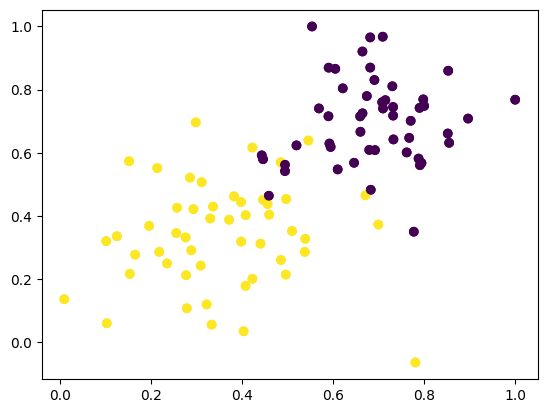

In [7]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [8]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [13]:
# Probability and score
def output_formula(features, weights, bias):
    return sigmoid(np.dot(features,weights)+bias)

In [9]:
# Cross entropy formula
def error_formula(y, output):
    return -y*np.log(output) - (1-y)*np.log(1-output)

In [10]:
def update_weights(x, y, weights, bias, learning_rate):
    output = output_formula(x, weights, bias)
    d_error = y - output
    weights = weights + learning_rate*d_error*x
    bias = bias + learning_rate*d_error
    return weights, bias

In [11]:
X.shape


(100, 2)

In [14]:
weights = np.random.normal(size=X.shape[1])
bias = 0
out = output_formula(X, weights, bias)
loss = error_formula(y, out)

In [15]:
np.mean(out > 0.5)

1.0

In [16]:
out

array([0.80033311, 0.66802564, 0.70065542, 0.68679415, 0.75775459,
       0.63923321, 0.66836361, 0.72909236, 0.70455628, 0.64042765,
       0.52416732, 0.60514008, 0.67312367, 0.74641774, 0.74698857,
       0.70914579, 0.73756653, 0.67004708, 0.72911331, 0.69751277,
       0.72793707, 0.70462189, 0.76445046, 0.5926375 , 0.81750639,
       0.72283361, 0.64959516, 0.61430121, 0.65499739, 0.75997081,
       0.64013014, 0.68069133, 0.67207223, 0.77286633, 0.6618361 ,
       0.63818873, 0.81799151, 0.72557462, 0.76475342, 0.73909868,
       0.71277272, 0.79848712, 0.6590261 , 0.75741037, 0.555333  ,
       0.60056165, 0.74895851, 0.69656154, 0.65283843, 0.71427783,
       0.83290734, 0.76160355, 0.87545598, 0.83478687, 0.82267579,
       0.90759701, 0.86013122, 0.84493353, 0.85638402, 0.85345717,
       0.7729666 , 0.8681899 , 0.83251141, 0.83827341, 0.85679446,
       0.85139209, 0.81062397, 0.77499928, 0.83596319, 0.87167713,
       0.86659625, 0.8356792 , 0.85341406, 0.83235723, 0.82030

In [17]:
np.mean((out > 0.5) == y)

0.5

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
import time
np.random.seed(42)

epochs = 1000
learning_rate = 0.01

def train(train_features, train_targets, test_features, test_targets, epochs, learning_rate):
    weights = np.random.normal(size=train_features.shape[1])
    bias = 0
    errors = []
    test_errors = []
    for epoch in range(epochs):
        for x, y in zip(train_features, train_targets):
            output = output_formula(x, weights, bias)
            weights, bias = update_weights(x, y, weights, bias, learning_rate)
        # at the end of one epoch
        out = output_formula(train_features, weights, bias)
        loss = np.mean(error_formula(train_targets, out))
        errors.append(loss)
        out_test = output_formula(test_features, weights, bias)
        loss_test = np.mean(error_formula(test_targets, out_test))
        test_errors.append(loss_test)
        
        if epoch % 10 == 0:
            print("Epoch:", epoch)
            print("Train loss", loss)
            predictions = out > 0.5
            accuracy = np.mean(predictions == train_targets)
            print("Train Accuracy", accuracy)
            print("Test loss", loss_test)
            predictions = out_test > 0.5
            accuracy = np.mean(predictions == test_targets)
            print("Test Accuracy", accuracy)
        plt.plot(errors)
        plt.plot(test_errors)
        

In [ ]:
train(X_train, y_train, X_test, y_test, epochs, learning_rate)